<a href="https://colab.research.google.com/github/gibril1435/Data-Mining/blob/main/Drugs_A%2C_B%2C_C%2C_X%2C_Y_for_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library & Load Dataset

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# File CSV yang ada di dataset Kaggle
file_path = "drug200.csv"

# Load dataset dari KaggleHub
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "pablomgomez21/drugs-a-b-c-x-y-for-decision-trees",
    file_path
)

print("Dataset berhasil dimuat!\n")

print("5 Data Pertama:")
display(df.head())

print("\nDimensi Dataset (baris, kolom):")
print(df.shape)


100%|██████████| 5.69k/5.69k [00:00<00:00, 6.76MB/s]

Dataset berhasil dimuat!

5 Data Pertama:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY



Dimensi Dataset (baris, kolom):
(200, 6)


# Preprocessing

In [ ]:
# Inisialisasi encoder
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()

# Encoding kolom kategorikal
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["BP"] = le_bp.fit_transform(df["BP"])
df["Cholesterol"] = le_chol.fit_transform(df["Cholesterol"])

print("Dataset Setelah Preprocessing")
display(df.head())

Dataset Setelah Preprocessing


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


# Split Data

In [ ]:
X = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]]
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Contoh Data Training (5 Baris)")
display(X_train.head())

Contoh Data Training (5 Baris)


,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,10.840
197,52,1,2,0,9.894
38,39,0,2,1,9.709
24,33,0,1,0,33.486
122,34,1,2,0,22.456


# Training Decision Tree

In [ ]:
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

print("Model berhasil dilatih.")

Model berhasil dilatih.


# Evaluasi Model

In [ ]:
y_pred = model.predict(X_test)

print("\nAkurasi Model")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report (Precision, Recall, F1)")
print(classification_report(y_test, y_pred))


Akurasi Model
1.0

Classification Report (Precision, Recall, F1)
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



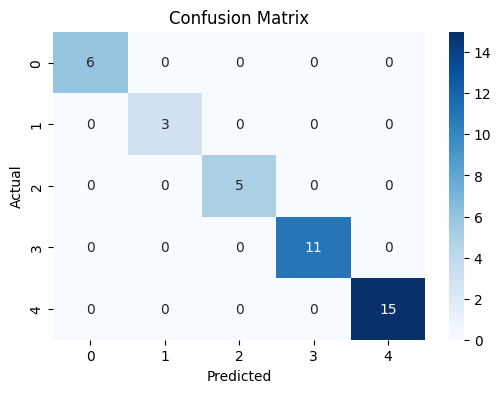

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Buat dataframe hasil prediksi vs asli
hasil_prediksi = X_test.copy()  # Salin data uji
hasil_prediksi["Drug_Actual"] = y_test.values  # Label asli
hasil_prediksi["Drug_Predicted"] = y_pred       # Hasil prediksi model

# Tampilkan 10 baris pertama
hasil_prediksi.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Actual,Drug_Predicted
95,36,1,1,1,11.424,drugX,drugX
15,16,0,0,1,15.516,drugY,drugY
30,18,0,2,1,8.750,drugX,drugX
158,59,0,1,0,10.444,drugC,drugC
128,47,1,1,1,33.542,drugY,drugY
115,51,1,0,0,18.295,drugY,drugY
69,18,0,0,1,24.276,drugY,drugY
170,28,0,2,0,12.879,drugX,drugX
174,42,1,0,1,12.766,drugA,drugA
45,66,0,2,1,8.107,drugX,drugX


# Visualisasi Pohon Keputusan

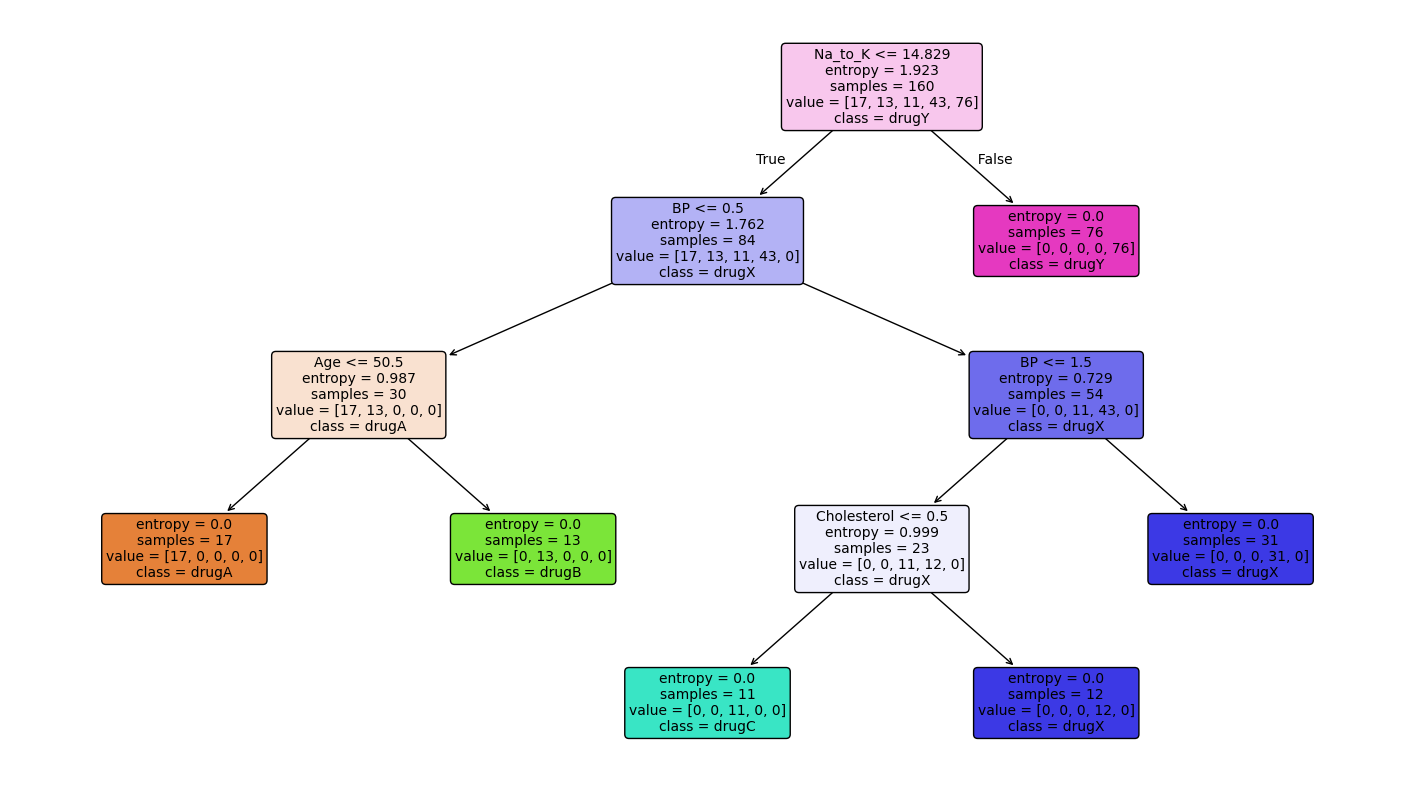

In [ ]:
plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# Prediksi Pasien Baru

In [ ]:
new_patient = pd.DataFrame({
    "Age": [50],
    "Sex": le_sex.transform(["F"]),
    "BP": le_bp.transform(["HIGH"]),
    "Cholesterol": le_chol.transform(["NORMAL"]),
    "Na_to_K": [13.5]
})

pred = model.predict(new_patient)
print("Obat yang direkomendasikan:", pred[0])

Obat yang direkomendasikan: drugA
